# Behavior Test (Insertion, Deletion, Replacement) Analysis

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
filenames = ['_'.join(["spanish",i,j]) + ".csv" for i in ["insertion", "deletion", "replacement"] for j in ["saint", "dkt1"]]

In [5]:
filenames # files in notion

['spanish_insertion_saint.csv',
 'spanish_insertion_dkt1.csv',
 'spanish_deletion_saint.csv',
 'spanish_deletion_dkt1.csv',
 'spanish_replacement_saint.csv',
 'spanish_replacement_dkt1.csv']

In [6]:
result_list = []
for fn in filenames:
    result_list.append(pd.read_csv(fn))

In [25]:
x = result_list[2]

In [26]:
x.head()

,Unnamed: 0,correct,is_perturbed,item_id,model_pred,orig_idx,orig_prob,orig_user_id,skill_id,testpass,timestamp,user_id,all
0,0,1,-1,175,0.961769,1508,0.959347,8,77,True,0,8_del,all
1,1,1,-1,176,0.978850,1509,0.964294,8,78,True,0,8_del,all
2,2,1,-1,185,0.909757,1510,0.977499,8,74,True,0,8_del,all
3,3,1,-1,196,0.979840,1511,0.955568,8,82,True,0,8_del,all
4,4,1,-1,198,0.957001,1512,0.967714,8,83,True,0,8_del,all


In [10]:
threshold = 0

for df in result_list:
    corr_df = df.loc[df['is_perturbed'] == 1]
    incorr_df = df.loc[df['is_perturbed'] == -1]
    corr_testpass = (corr_df['model_pred'] >= corr_df['orig_prob'] - threshold).values.tolist()
    incorr_testpass = (incorr_df['model_pred'] <= incorr_df['orig_prob'] + threshold).values.tolist()
    print(corr_testpass.count(True), '|', corr_testpass.count(False), '->', corr_testpass.count(True)/len(corr_testpass))
    print(incorr_testpass.count(True), '|', incorr_testpass.count(False), '->', incorr_testpass.count(True)/len(incorr_testpass))
    print((corr_testpass.count(True)+incorr_testpass.count(True)) / len(df))
    print()

25939 | 25849 -> 0.5008689271645941
26506 | 25282 -> 0.51181740943848
0.506343168301537

27037 | 24751 -> 0.5220707499806905
23588 | 28200 -> 0.45547231018768825
0.4887715300841894

5287 | 3707 -> 0.5878363353346675
49863 | 43160 -> 0.5360287240789913
0.5405961751472794

3653 | 5341 -> 0.4061596619968868
45661 | 47362 -> 0.4908570998570246
0.4833900232314222

5323 | 3671 -> 0.591839003780298
49883 | 43140 -> 0.5362437246702428
0.5411451032671025

3687 | 5307 -> 0.40993995997331556
45746 | 47277 -> 0.491770852369844
0.48455649548604646



## Model Summary

DKT original test auc : 0.8278944242188684

SAINT original test auc : 0.847428944098048

test pass probability (threshold=0.0)

| model | test AUC | insertion | deletion | replacement |
| :---: | -------: | --------: | -------: | ----------: |
| DKT   | 0.8279   | 48.88%    | 48.34%   | 48.45%      |
| SAINT | 0.8474   | 50.63%    | 54.06%   | 54.11%      |

## Detailed Analysis

### Impact upon steps(num of interactions)

101_corr


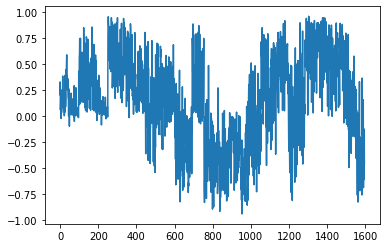

101_corr


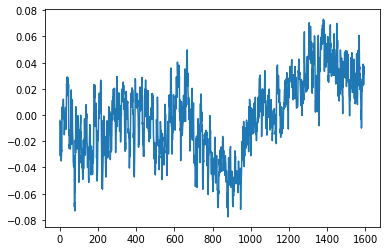

101_del


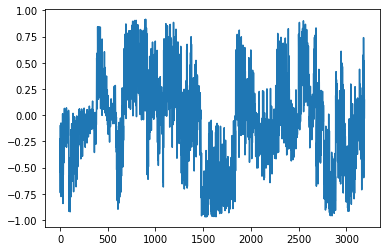

101_del


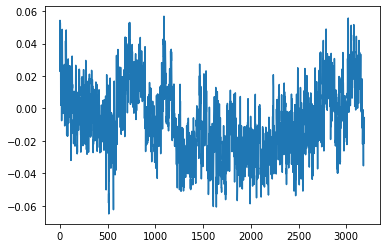

101_incorr


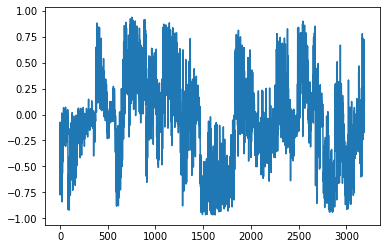

101_incorr


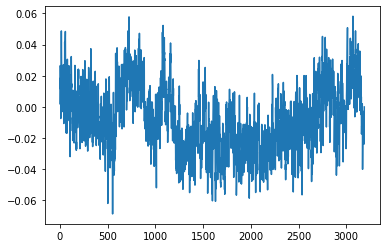

In [24]:
all_results = []
for df in result_list:
    user_group_df = df.groupby(['user_id'])
    new_df_list = []
    sample = True
    for name, group in user_group_df:
        start_idx = group.iloc[0]['orig_idx']
        group.loc[:, 'new_idx'] = group['orig_idx'] - start_idx
        if sample:
            corr_df = group.loc[df['is_perturbed'] == 1]
            incorr_df = group.loc[df['is_perturbed'] == -1]
            sample_corr = (corr_df['model_pred'] - corr_df['orig_prob']).values.tolist()
            sample_incorr = (incorr_df['model_pred'] - incorr_df['orig_prob']).values.tolist()
            print(name)
            if sample_corr:
                plt.plot(sample_corr)
                plt.show()
            if sample_incorr:
                plt.plot(sample_incorr)
                plt.show()
            sample = False
        new_df_list.append(group)
    new_df = pd.concat(new_df_list, axis=0).reset_index(drop=True)
    all_results.append(new_df)

### Original model prediction analysis

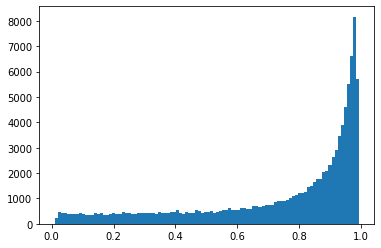

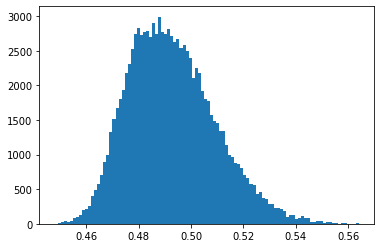

In [29]:
for df in result_list[:2]:
    orig_probs = df['orig_prob'].values.tolist()
    plt.hist(orig_probs, bins=100)
    plt.show()